In [2]:
pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
df = wine_quality.data.original

  
# metadata 
print(X.head(5))  

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [23]:
df_red = df[df['color'] == 'red']
df_white = df[df['color'] == 'white']
df_red = df_red.drop('color', axis=1)
df_white = df_white.drop('color', axis=1) 


X_red = df_red.drop('quality', axis=1)  # Features
y_red = df_red['quality']               # Target


X_white = df_white.drop('quality', axis=1)  # Features
y_white = df_white['quality']               # Target

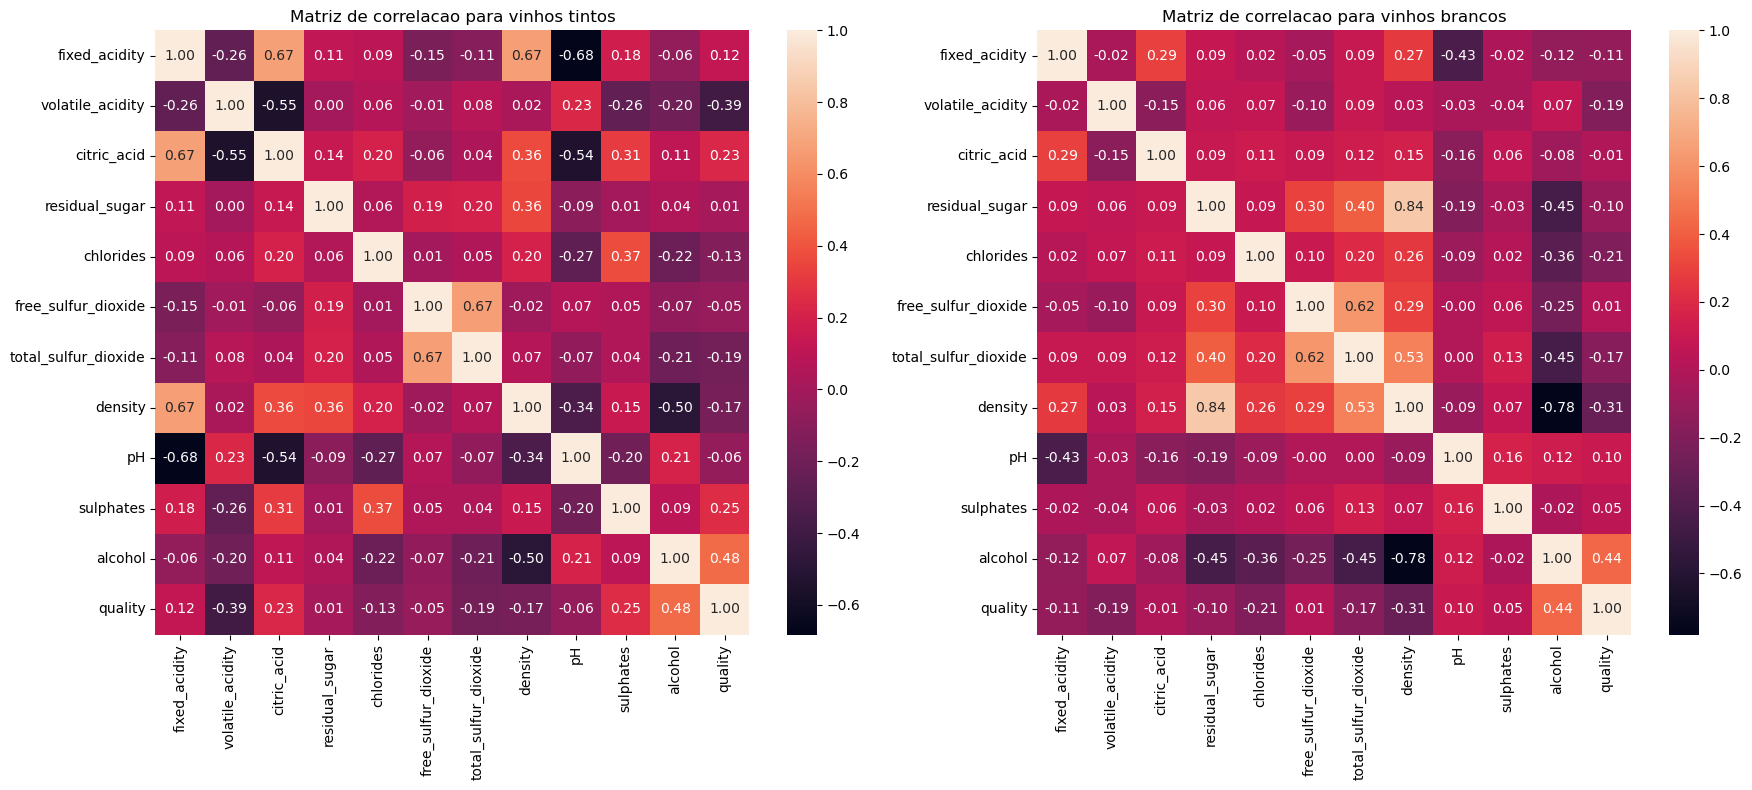

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular matrizes de correlacao
corr_red = df_red.corr()
corr_white = df_white.corr()

f, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(corr_red, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Matriz de correlacao para vinhos tintos')


sns.heatmap(corr_white, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Matriz de correlacao para vinhos brancos')

plt.tight_layout()
plt.show()


In [25]:
#Verificacao de missing values

# Para vinho tinto
missing_values_red = df_red.isna().sum()
print("Missing Values no dataset de vinho tinto:\n", missing_values_red)

# Para vinho branco
missing_values_white = df_white.isna().sum()
print("\nMissing Values no dataset de vinho branco:\n", missing_values_white)


Missing Values no dataset de vinho tinto:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing Values no dataset de vinho branco:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [27]:
# Vinho tinto 
quality_counts_red = df_red['quality'].value_counts()
print("Distribuicao de classes no dataset de vinho tinto:\n", quality_counts_red)

# Vinho branco
quality_counts_white = df_white['quality'].value_counts()
print("\nDistribuicao de classes no dataset de vinho branco:\n", quality_counts_white)


Distribuicao de classes no dataset de vinho tinto:
 quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Distribuicao de classes no dataset de vinho branco:
 quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [28]:
#Datasets de treino e teste

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)


# Decision tree classifier red wine original dataset

Accuracy no dataset de vinho tinto: 0.58125


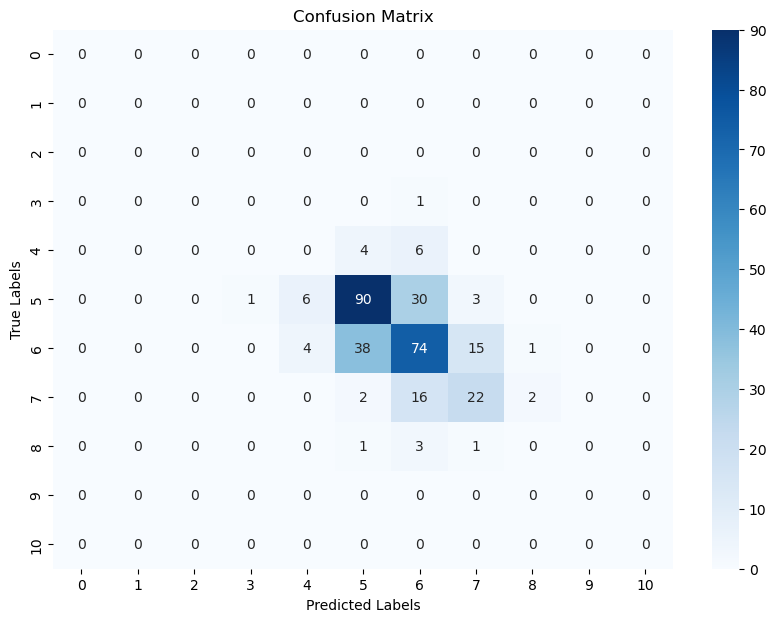

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix




dt_classifier_red = DecisionTreeClassifier()

dt_classifier_red.fit(X_train_red, y_train_red)

y_pred_red = dt_classifier_red.predict(X_test_red)

# Avaliacao do modelo
print("Accuracy no dataset de vinho tinto:", accuracy_score(y_test_red, y_pred_red))


classes = list(range(11))

# confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(0, 11), yticklabels=range(0, 11))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


plt.show()


# Decision tree classifier white wine original dataset

Accuracy no dataset de vinho branco: 0.6255102040816326


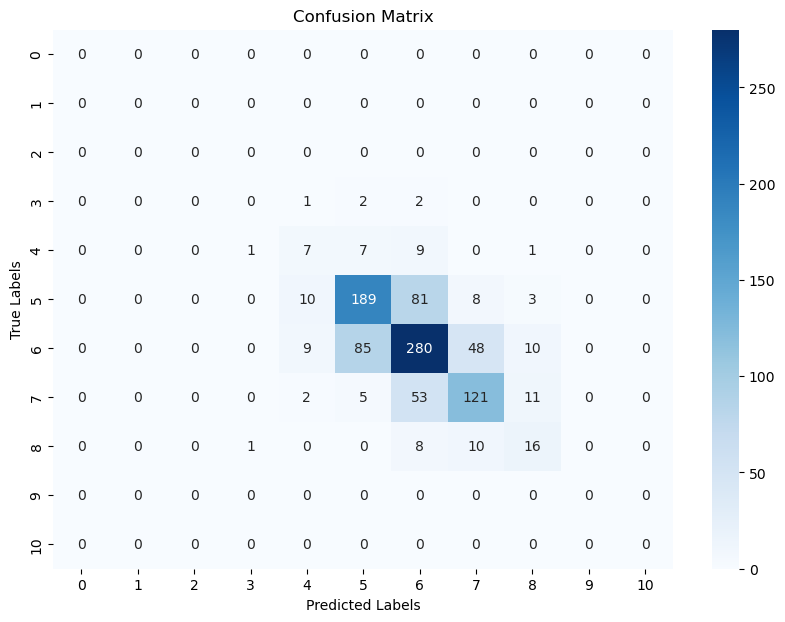

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


dt_classifier_white = DecisionTreeClassifier()

dt_classifier_white.fit(X_train_white, y_train_white)

y_pred_white = dt_classifier_white.predict(X_test_white)

# Avalicao do modelo
print("Accuracy no dataset de vinho branco:", accuracy_score(y_test_white, y_pred_white))

classes = list(range(11))

# confusion matrix
cm = confusion_matrix(y_test_white, y_pred_white, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(0, 11), yticklabels=range(0, 11))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


# MLP Classifier red wine Original dataset

C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy no dataset de vinho tinto: 0.565625


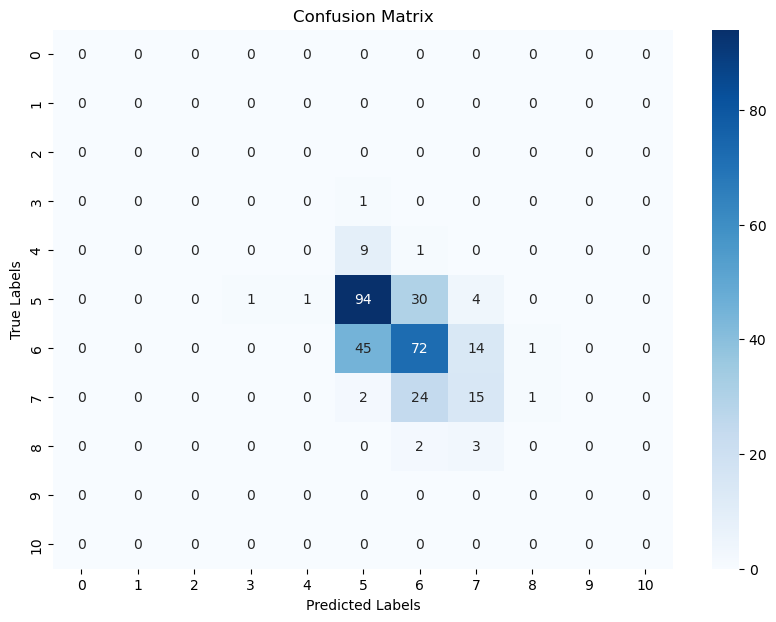

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



mlp_classifier_red = MLPClassifier(hidden_layer_sizes=(50,), max_iter=3000, random_state=42, solver = "lbfgs")

mlp_classifier_red.fit(X_train_red, y_train_red)

y_pred_red = mlp_classifier_red.predict(X_test_red)

# Avalicao do modelo
print("Accuracy no dataset de vinho tinto:", accuracy_score(y_test_red, y_pred_red))

classes = list(range(11))

# confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


# MLP Classifier white wine Original dataset

Accuracy no dataset de vinho branco: 0.5204081632653061


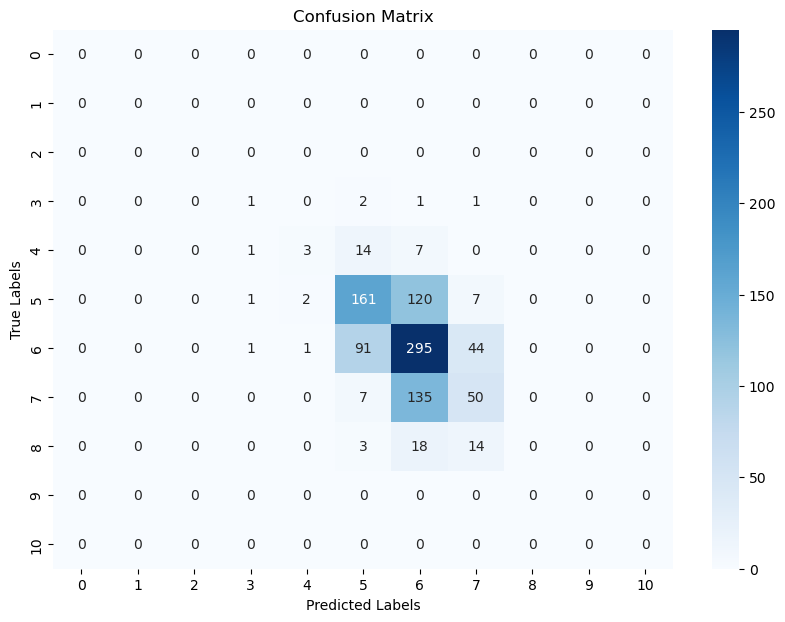

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



mlp_classifier_white = MLPClassifier(hidden_layer_sizes=(50,), max_iter=50000, random_state=42, solver = "lbfgs")

mlp_classifier_white.fit(X_train_white, y_train_white)

y_pred_white = mlp_classifier_white.predict(X_test_white)

# Avaliacao do modelo
print("Accuracy no dataset de vinho branco:", accuracy_score(y_test_white, y_pred_white))

classes = list(range(11))

cm = confusion_matrix(y_test_white, y_pred_white, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

# KNN Classifier red wine Original Dataset

In [33]:
# Encontrar o melhor numero de neighbours com cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(2, 100)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_red, y_red)

# Imprimir o numero otimo de parametros e o melhor score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Cross-Validated Score: {:.2f}".format(grid_search.best_score_))


Best Parameters: {'n_neighbors': 29}
Best Cross-Validated Score: 0.51


Accuracy no dataset de vinho tinto : 0.509375


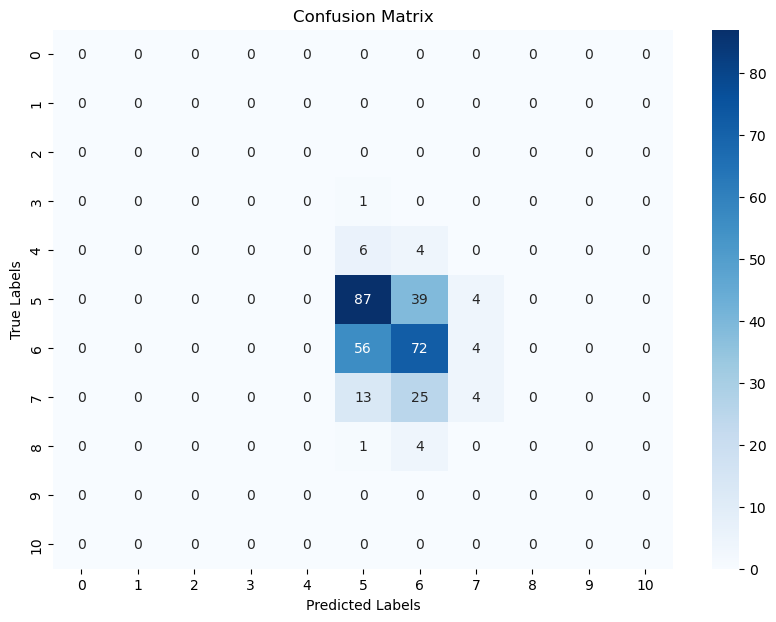

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


knn_classifier_red = KNeighborsClassifier(n_neighbors=29)  

knn_classifier_red.fit(X_train_red, y_train_red)

y_pred_red = knn_classifier_red.predict(X_test_red)

# Avaliacao do modelo
print("Accuracy no dataset de vinho tinto :", accuracy_score(y_test_red, y_pred_red))

classes = list(range(11))

# confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


# KNN Classifier white wine Original Dataset

In [39]:
# Encontrar o melhor numero de neighbours com cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(2, 100)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_white, y_white)

# Imprimir o numero otimo de parametros e o melhor score
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Cross-Validated Score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'n_neighbors': 52}
Best Cross-Validated Score: 0.44


Accuracy on White Wine Dataset: 0.4448979591836735


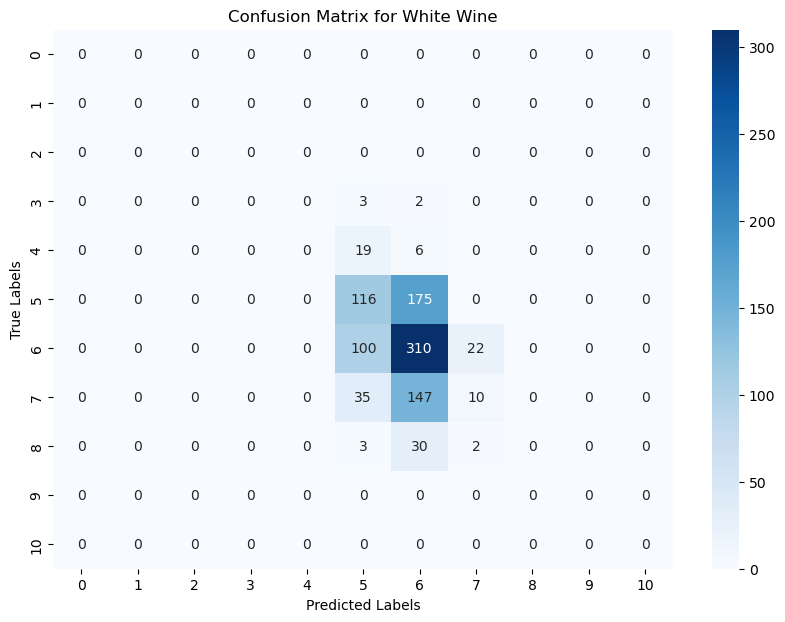

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


knn_classifier_white = KNeighborsClassifier(n_neighbors=52)  

knn_classifier_white.fit(X_train_white, y_train_white)

y_pred_white = knn_classifier_white.predict(X_test_white)

# Avaliacao do modelo
print("Accuracy no dataset de vinho branco:", accuracy_score(y_test_white, y_pred_white))

classes = list(range(11))

# confusion matrix
cm_white = confusion_matrix(y_test_white, y_pred_white, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_white, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for White Wine')

plt.show()


# K-means red Wine Original Dataset
6 classes pois é o numero de classes presentes no dataset

C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy do clustering k-means: 0.5125


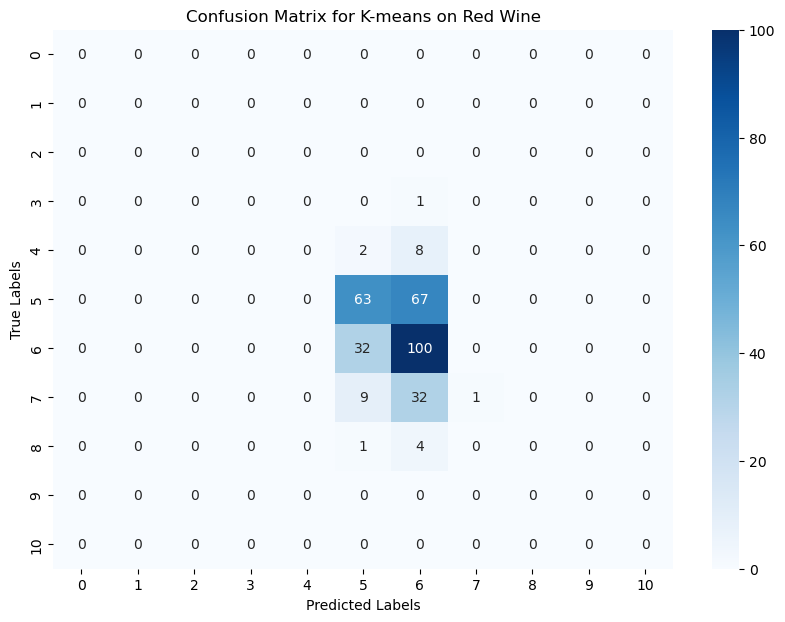

In [43]:
from sklearn.cluster import KMeans
from scipy.stats import mode
import numpy as np

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_train_red)
clusters = kmeans.predict(X_test_red)

labels = np.zeros_like(clusters)
for i in range(n_clusters):
    mask = (clusters == i)
    labels[mask] = mode(y_test_red[mask])[0]

# Avalicao do clustering (using accuracy as an example)
accuracy = np.sum(labels == y_test_red) / len(y_test_red)
print("Accuracy do clustering k-means:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test_red, labels, labels=range(11))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(0, 11), yticklabels=range(0, 11))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-means on Red Wine')
plt.show()


# K-means white wine Original Dataset

C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy of K-means Clustering: 0.45714285714285713


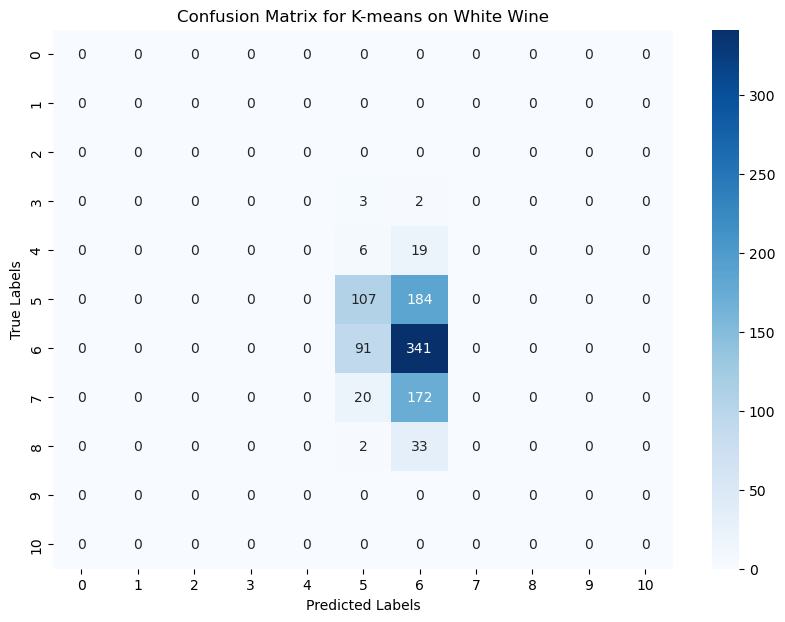

In [42]:
from sklearn.cluster import KMeans
from scipy.stats import mode
import numpy as np

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_train_white)
clusters = kmeans.predict(X_test_white)

labels = np.zeros_like(clusters)
for i in range(n_clusters):
    mask = (clusters == i)
    labels[mask] = mode(y_test_white[mask])[0]

accuracy = np.sum(labels == y_test_white) / len(y_test_white)
print("Accuracy do clustering k-means:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test_white, labels, labels=range(11))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(0, 11), yticklabels=range(0, 11))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-means on White Wine')
plt.show()

# DBSCAN Original Dataset

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


# k = min_samples
k = 12

# Computar os nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X_train_red)
distances, indices = nbrs.kneighbors(X_train_red)

# Fazer sort das distancias
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance to the k-th nearest neighbor")
plt.ylabel("Epsilon (k-th nearest neighbor distance)")
plt.axhline(y=17, color='r', linestyle='--')  # Example line, adjust the y-value based on your observation
plt.show()


O "cotovelo" é à volta do 17, por isso vai ser esse o nosso epsilon.

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Aplicacao DBScan
dbscan = DBSCAN(eps=17, min_samples=12)
clusters = dbscan.fit_predict(X_train_red)


if len(set(clusters)) > 1:
    silhouette = silhouette_score(X_train_red, clusters)
    print("Silhouette Score: {:.2f}".format(silhouette))
else:
    print("DBSCAN found only one cluster or assigned all points as noise.")

print("Number of clusters:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Number of noise points:", list(clusters).count(-1))

Silhouette Score: 0.70
Number of clusters: 1
Number of noise points: 3


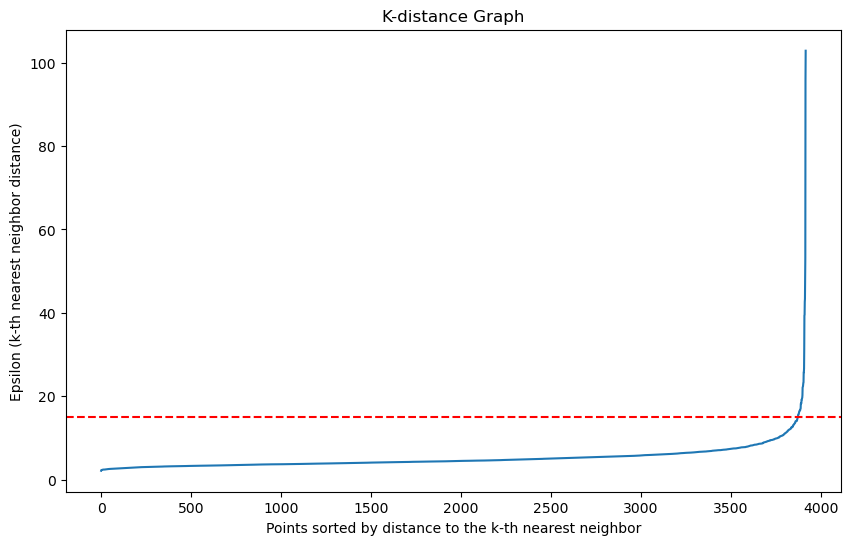

In [145]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Scaling the data
#scaler = StandardScaler()
#X_scaled_white = scaler.fit_transform(X_train_white)

# Choose k=MinPts, the same as what you plan to use in DBSCAN
k = 12

# Compute the nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X_train_white)
distances, indices = nbrs.kneighbors(X_train_white)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

# Plotting the k-distance graph
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance to the k-th nearest neighbor")
plt.ylabel("Epsilon (k-th nearest neighbor distance)")
plt.axhline(y=15, color='r', linestyle='--')  # Example line, adjust the y-value based on your observation
plt.show()


In [164]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Scaling the data
#scaler = StandardScaler()
#X_scaled_white = scaler.fit_transform(X_train_red)

# Applying DBSCAN
# These parameters (eps and min_samples) are just a starting point
dbscan = DBSCAN(eps=15, min_samples=12)
clusters = dbscan.fit_predict(X_train_white)

# Evaluating the clustering
# Note: silhouette score is only informative if the number of clusters is > 1 and < len(data) - 1
if len(set(clusters)) > 1:
    silhouette = silhouette_score(X_train_white, clusters)
    print("Silhouette Score: {:.2f}".format(silhouette))
else:
    print("DBSCAN found only one cluster or assigned all points as noise.")

# You can also inspect the number of clusters and noise points
print("Number of clusters:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Number of noise points:", list(clusters).count(-1))

Silhouette Score: 0.53
Number of clusters: 1
Number of noise points: 16


# Aglomarative hierrarchical clustering Original Dataset

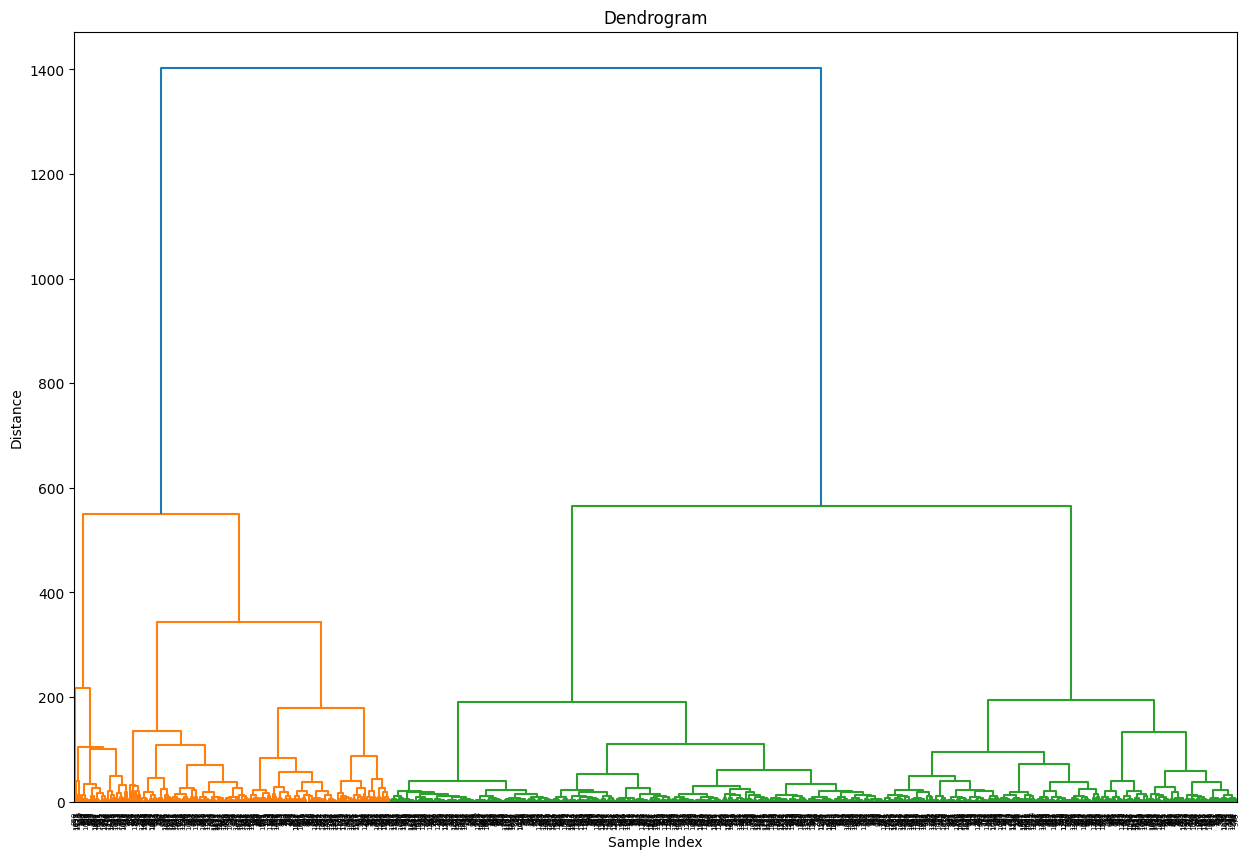

In [125]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Aplicacao Agglomerative Clustering

linkage_matrix = linkage(X_train_red, method='ward')

# Dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


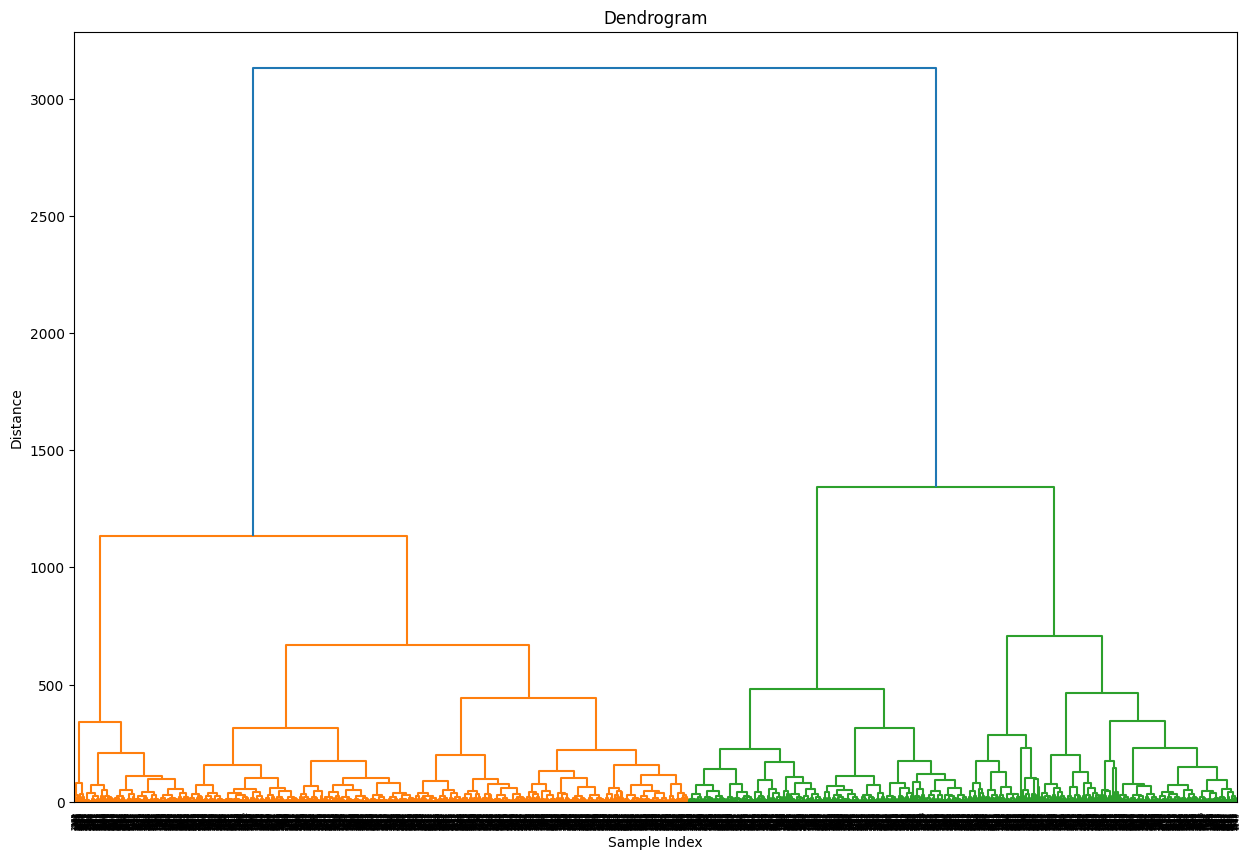

In [126]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



# Aplicacao Agglomerative Clustering

linkage_matrix = linkage(X_train_white, method='ward')

# Dendogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [168]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np


# Aplicacao Agglomerative Clustering com 6 clusters
agg_clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(X_train_white)

# Evaluating the clustering

silhouette = silhouette_score(X_train_white, cluster_labels)
print("Silhouette Score: {:.2f}".format(silhouette))

# Print cluster labels to see the distribution
print("Cluster labels:", np.unique(cluster_labels, return_counts=True))

# Visualizing the clusters can be done if you reduce the dimensionality of your dataset (e.g., using PCA)
# This step is optional and depends on the feasibility and the nature of your data


C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score: 0.27
Cluster labels: (array([0, 1, 2, 3, 4, 5], dtype=int64), array([944, 663, 923, 386, 240, 762], dtype=int64))


# Modified dataset


In [124]:
from sklearn.preprocessing import StandardScaler

X_red_modified = X_red.drop('residual_sugar', axis=1).copy()
X_white_modified = X_white.drop(['citric_acid', 'free_sulfur_dioxide'], axis=1).copy()

# Standardizar as features para o vinho tinto
scaler_red = StandardScaler()
X_red_standardized = scaler_red.fit_transform(X_red_modified)

# Standardizar as features para o vinho branco
scaler_white = StandardScaler()
X_white_standardized = scaler_white.fit_transform(X_white_modified)

# Converter 'quality' para binario para os vinhos tintos
y_red_binary = y_red.apply(lambda x: 1 if x > 5 else 0).copy()

# Converter 'quality' para binario para os vinhos brancos
y_white_binary = y_white.apply(lambda x: 1 if x > 5 else 0).copy()


In [123]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Funcao para remover randomly uma percentagem de valores
def remove_values_randomly(df, percent):
    modified_df = df.copy()
    for col in modified_df.columns:
        modified_df.loc[modified_df.sample(frac=percent).index, col] = np.nan
    return modified_df


X_red_10 = remove_values_randomly(pd.DataFrame(X_red_standardized), 0.10)
X_red_20 = remove_values_randomly(pd.DataFrame(X_red_standardized), 0.20)
X_red_30 = remove_values_randomly(pd.DataFrame(X_red_standardized), 0.30)

X_white_10 = remove_values_randomly(pd.DataFrame(X_white_standardized), 0.10)
X_white_20 = remove_values_randomly(pd.DataFrame(X_white_standardized), 0.20)
X_white_30 = remove_values_randomly(pd.DataFrame(X_white_standardized), 0.30)

# Imputatacao com a media

imputer = SimpleImputer(strategy='mean')

X_red_10_imputed = imputer.fit_transform(X_red_10)
X_red_20_imputed = imputer.fit_transform(X_red_20)
X_red_30_imputed = imputer.fit_transform(X_red_30)

X_white_10_imputed = imputer.fit_transform(X_white_10)
X_white_20_imputed = imputer.fit_transform(X_white_20)
X_white_30_imputed = imputer.fit_transform(X_white_30)






In [122]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Funcao para remover randomly uma percentagem de valores e ajustar os targets 
def remove_values_and_adjust_target(X, y, percent):
    modified_X = X.copy()
    for col in modified_X.columns:
        modified_X.loc[modified_X.sample(frac=percent).index, col] = np.nan
    
    modified_X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
       
    missing_rows = modified_X.isna().any(axis=1)
    dropped_X = modified_X.dropna()
    dropped_y = y[~missing_rows]

    return dropped_X, dropped_y

# Criar datasets com 10%, 20% e 30% dos valores removidos e com os targets ajustados
X_red_10_dropped, y_red_10_dropped = remove_values_and_adjust_target(pd.DataFrame(X_red_standardized), y_red_binary, 0.10)
X_red_20_dropped, y_red_20_dropped = remove_values_and_adjust_target(pd.DataFrame(X_red_standardized), y_red_binary, 0.20)
X_red_30_dropped, y_red_30_dropped = remove_values_and_adjust_target(pd.DataFrame(X_red_standardized), y_red_binary, 0.30)

X_white_10_dropped, y_white_10_dropped = remove_values_and_adjust_target(pd.DataFrame(X_white_standardized), y_white_binary, 0.10)
X_white_20_dropped, y_white_20_dropped = remove_values_and_adjust_target(pd.DataFrame(X_white_standardized), y_white_binary, 0.20)
X_white_30_dropped, y_white_30_dropped = remove_values_and_adjust_target(pd.DataFrame(X_white_standardized), y_white_binary, 0.30)





In [142]:
from sklearn.decomposition import PCA

# Numero de componentes do PCA
n_components = 7

# Aplicar PCA ao vinho tinto
pca_red = PCA(n_components=n_components)
X_red_pca = pca_red.fit_transform(X_red_standardized)

# Aplicar PCA ao vinho branco
pca_white = PCA(n_components=n_components)
X_white_pca = pca_white.fit_transform(X_white_standardized)

# Explained variance 
print("Explained Variance Ratio for Red Wine Dataset:", sum(pca_red.explained_variance_ratio_))
print("Explained Variance Ratio for White Wine Dataset:", sum(pca_white.explained_variance_ratio_))


Explained Variance Ratio for Red Wine Dataset: 0.938177201412717
Explained Variance Ratio for White Wine Dataset: 0.9506782315694605


In [134]:

dataset_variants = [
    ('original_standardized_red', X_red_standardized, y_red),
    ('original_standardized_white', X_white_standardized, y_white),
    ('standardized_red_binary', X_red_standardized, y_red_binary),
    ('standardized_white_binary', X_white_standardized, y_white_binary),
    # Dataset the vinho tinto com valores removidos e imputados 
    ('red_10_imputed', X_red_10_imputed, y_red_binary),
    ('red_20_imputed', X_red_20_imputed, y_red_binary),
    ('red_30_imputed', X_red_30_imputed, y_red_binary),
    # Dataset de vinho tinto com valores excluidos 
    ('red_10_dropped', X_red_10_dropped, y_red_10_dropped),
    ('red_20_dropped', X_red_20_dropped, y_red_20_dropped),
    ('red_30_dropped', X_red_30_dropped, y_red_30_dropped),
    # Dataset the vinho branco com valores removidos e imputados 
    ('white_10_imputed', X_white_10_imputed, y_white_binary),
    ('white_20_imputed', X_white_20_imputed, y_white_binary),
    ('white_30_imputed', X_white_30_imputed, y_white_binary),
    # Dataset de vinho branco com valores excluidos
    ('white_10_dropped', X_white_10_dropped, y_white_10_dropped),
    ('white_20_dropped', X_white_20_dropped, y_white_20_dropped),
    ('white_30_dropped', X_white_30_dropped, y_white_30_dropped),
    # Dataset de vinho tinto com PCA
     ('red_PCA', X_red_pca, y_red_binary),
    # Dataset de vinho branco com PCA
    ('white_PCA', X_white_pca, y_white_binary),
    
    
]

# Decision Trees

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Funcao para aplicar Decision Trees e calcular accuracy
def apply_decision_tree(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

accuracies = {}

# Aplicar Decision Trees aos varios datasets 
for name, X, y in dataset_variants:
    accuracy = apply_decision_tree(X, y)
    accuracies[name] = accuracy

for dataset_name, accuracy in accuracies.items():
    print(f"Accuracy for {dataset_name}: {accuracy:.2f}")


Accuracy for original_standardized_red: 0.59
Accuracy for original_standardized_white: 0.60
Accuracy for standardized_red_binary: 0.72
Accuracy for standardized_white_binary: 0.77
Accuracy for red_10_imputed: 0.72
Accuracy for red_20_imputed: 0.68
Accuracy for red_30_imputed: 0.62
Accuracy for red_10_dropped: 0.68
Accuracy for red_20_dropped: 0.70
Accuracy for red_30_dropped: 0.70
Accuracy for white_10_imputed: 0.71
Accuracy for white_20_imputed: 0.68
Accuracy for white_30_imputed: 0.68
Accuracy for white_10_dropped: 0.72
Accuracy for white_20_dropped: 0.70
Accuracy for white_30_dropped: 0.76
Accuracy for red_PCA: 0.69
Accuracy for white_PCA: 0.78


# MLP

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Funcao para aplicar MLP e calcular accuracy
def apply_mlp_classifier(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(60,), max_iter=50000, random_state=42, solver = "lbfgs")
    mlp_classifier.fit(X_train, y_train)

    
    y_pred = mlp_classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)




accuracies_mlp = {}

# Aplicar MLP aos vários datasets
for name, X, y in dataset_variants:
    accuracy = apply_mlp_classifier(X, y)
    accuracies_mlp[name] = accuracy

for dataset_name, accuracy in accuracies_mlp.items():
    print(f"Accuracy for {dataset_name} with MLP: {accuracy:.2f}")


Accuracy for original_red with MLP: 0.59
Accuracy for original_white with MLP: 0.53
Accuracy for standardized_red with MLP: 0.77
Accuracy for standardized_white with MLP: 0.75
Accuracy for red_10_imputed with MLP: 0.65
Accuracy for red_20_imputed with MLP: 0.64
Accuracy for red_30_imputed with MLP: 0.67
Accuracy for red_10_dropped with MLP: 0.64
Accuracy for red_20_dropped with MLP: 0.52
Accuracy for red_30_dropped with MLP: 0.80
Accuracy for white_10_imputed with MLP: 0.72
Accuracy for white_20_imputed with MLP: 0.72
Accuracy for white_30_imputed with MLP: 0.69
Accuracy for white_10_dropped with MLP: 0.75
Accuracy for white_20_dropped with MLP: 0.75
Accuracy for white_30_dropped with MLP: 0.61
Accuracy for red_PCA with MLP: 0.73
Accuracy for white_PCA with MLP: 0.74


# KNN

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Funcao para aplicar kNN com cross-Validation e encontrar o melhor k
def apply_knn_classifier(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    param_grid = {'n_neighbors': range(1, 31)}

    
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

   
    grid_search.fit(X_train, y_train)

    # Usar o melhor k para criar e treinar o classificador kNN 
    best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
    best_knn.fit(X_train, y_train)

   
    y_pred = best_knn.predict(X_test)
    return accuracy_score(y_test, y_pred)


accuracies_knn = {}

# Aplicar kNN aos vários datasets
for name, X, y in dataset_variants:
    accuracy = apply_knn_classifier(X, y)
    accuracies_knn[name] = accuracy


for dataset_name, accuracy in accuracies_knn.items():
    print(f"Accuracy for {dataset_name} with KNN: {accuracy:.2f}")


C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Accuracy for original_standardized_red with KNN: 0.63
Accuracy for original_standardized_white with KNN: 0.65
Accuracy for standardized_red_binary with KNN: 0.77
Accuracy for standardized_white_binary with KNN: 0.81
Accuracy for red_10_imputed with KNN: 0.72
Accuracy for red_20_imputed with KNN: 0.71
Accuracy for red_30_imputed with KNN: 0.71
Accuracy for red_10_dropped with KNN: 0.70
Accuracy for red_20_dropped with KNN: 0.70
Accuracy for red_30_dropped with KNN: 0.60
Accuracy for white_10_imputed with KNN: 0.76
Accuracy for white_20_imputed with KNN: 0.73
Accuracy for white_30_imputed with KNN: 0.71
Accuracy for white_10_dropped with KNN: 0.76
Accuracy for white_20_dropped with KNN: 0.76
Accuracy for white_30_dropped with KNN: 0.84
Accuracy for red_PCA with KNN: 0.73
Accuracy for white_PCA with KNN: 0.80


# K_means

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Funcao para aplicar o k-Means, criar tabela de contingencia e calcular accuracy
def apply_kmeans_and_evaluate(X, y, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    clusters = kmeans.predict(X)

    contingency_table = pd.crosstab(y, clusters, rownames=['Actual'], colnames=['Predicted'], margins=True)

    # Determinar a classe mais comum para cada cluster
    cluster_to_class = {}
    for cluster in np.unique(clusters):
        
        most_common_class = y[clusters == cluster].mode()[0]
        cluster_to_class[cluster] = most_common_class

    
    predicted_classes = [cluster_to_class[cluster] for cluster in clusters]

    accuracy = accuracy_score(y, predicted_classes)

    return contingency_table, accuracy




contingency_tables = {}
accuracies = {}

# Aplicar o k-Means aos varios datasets
for name, X, y in dataset_variants:
    n_clusters = 6 if 'original' in name else 2  # 6 clusters para o original, 2 para os outros
    table, accuracy = apply_kmeans_and_evaluate(X, y, n_clusters)
    contingency_tables[name] = table
    accuracies[name] = accuracy

for dataset_name in dataset_variants:
    print(f"Contingency Table for {dataset_name[0]}:\n{contingency_tables[dataset_name[0]]}\n")
    print(f"Accuracy for {dataset_name[0]}: {accuracies[dataset_name[0]]:.2f}\n")


C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gonca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Contingency Table for original_standardized_red:
Predicted    0    1   2    3    4    5   All
Actual                                      
3            7    2   0    0    1    0    10
4           32    4   1    9    4    3    53
5          282   87  17   35  238   22   681
6          175  135   9  106   98  115   638
7           20   54   1   25   12   87   199
8            0    4   0    4    0   10    18
All        516  286  28  179  353  237  1599

Accuracy for original_standardized_red: 0.56

Contingency Table for original_standardized_white:
Predicted    0    1    2    3    4     5   All
Actual                                        
3            3    4    2    6    1     4    20
4           27   16   16   53    4    47   163
5           84  345  169  499   48   312  1457
6          379  400  497  387   47   488  2198
7          359  102  217   36    2   164   880
8           76   17   37    6    2    37   175
9            4    0    0    0    0     1     5
All        932  884  938 

# DBSCAN

In [176]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Funcao para aplicar o DBScan, criar a tabela de contingencia e calcular accuracy 
def apply_dbscan_and_evaluate(X, y, eps, min_samples):
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

   
    contingency_table = pd.crosstab(y, clusters, rownames=['Actual'], colnames=['Predicted'], margins=True)

    # Determinar a classe mais comum em cada cluster
    cluster_to_class = {}
    unique_clusters = np.unique(clusters[clusters != -1])  # Excluir noise points
    for cluster in unique_clusters:
        
        most_common_class = y[clusters == cluster].mode()[0]
        cluster_to_class[cluster] = most_common_class

   
    predicted_classes = [cluster_to_class.get(cluster, np.nan) for cluster in clusters]

    accuracy = accuracy_score(y[clusters != -1], [pred for pred, clust in zip(predicted_classes, clusters) if clust != -1])

    return contingency_table, accuracy

eps = 17  
min_samples = 12 

contingency_tables_dbscan = {}
accuracies_dbscan = {}

# Aplicar o DBScan aos varios datasets
for name, X, y in dataset_variants:
    table, accuracy = apply_dbscan_and_evaluate(X, y, eps, min_samples)
    contingency_tables_dbscan[name] = table
    accuracies_dbscan[name] = accuracy

for dataset_name in dataset_variants:
    print(f"Contingency Table for {dataset_name[0]}:\n{contingency_tables_dbscan[dataset_name[0]]}\n")
    print(f"Accuracy for {dataset_name[0]} with DBSCAN: {accuracies_dbscan[dataset_name[0]]:.2f}\n")


Contingency Table for original_standardized_red:
Predicted     0   All
Actual               
3            10    10
4            53    53
5           681   681
6           638   638
7           199   199
8            18    18
All        1599  1599

Accuracy for original_standardized_red with DBSCAN: 0.43

Contingency Table for original_standardized_white:
Predicted     0   All
Actual               
3            20    20
4           163   163
5          1457  1457
6          2198  2198
7           880   880
8           175   175
9             5     5
All        4898  4898

Accuracy for original_standardized_white with DBSCAN: 0.45

Contingency Table for standardized_red_binary:
Predicted     0   All
Actual               
0           744   744
1           855   855
All        1599  1599

Accuracy for standardized_red_binary with DBSCAN: 0.53

Contingency Table for standardized_white_binary:
Predicted     0   All
Actual               
0          1640  1640
1          3258  3258
All        

# Aglomarative hierrarchical clustering

In [167]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Funcao para aplicar o Agglomerative Hierarchical Clustering, criar tabela de contingencia e calcular accuracy
def apply_agglomerative_and_evaluate(X, y, n_clusters):
    
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(X)

    contingency_table = pd.crosstab(y, clusters, rownames=['Actual'], colnames=['Predicted'], margins=True)

    # Determinar a classe mais comum em cada cluster 
    cluster_to_class = {}
    for cluster in np.unique(clusters):
        
        most_common_class = y[clusters == cluster].mode()[0]
        cluster_to_class[cluster] = most_common_class

    predicted_classes = [cluster_to_class[cluster] for cluster in clusters]

    accuracy = accuracy_score(y, predicted_classes)

    return contingency_table, accuracy




contingency_tables_agg = {}
accuracies_agg = {}

# Aplicar Agglomerative Clustering aos varios datasets
for name, X, y in dataset_variants:
    n_clusters = 6 if 'original' in name else 2  # 6 clusters para o original, 2 para os outros 
    table, accuracy = apply_agglomerative_and_evaluate(X, y, n_clusters)
    contingency_tables_agg[name] = table
    accuracies_agg[name] = accuracy

for dataset_name in dataset_variants:
    print(f"Contingency Table for {dataset_name[0]}:\n{contingency_tables_agg[dataset_name[0]]}\n")
    print(f"Accuracy for {dataset_name[0]} with Agglomerative Clustering: {accuracies_agg[dataset_name[0]]:.2f}\n")


Contingency Table for original_red:
Predicted    0    1    2    3   4  5   All
Actual                                    
3            1    0    7    2   0  0    10
4           10    2   29   11   1  0    53
5          169   95  232  124  61  0   681
6          146   33  278  175   6  0   638
7           23    9  120   45   0  2   199
8            3    1   12    2   0  0    18
All        352  140  678  359  68  2  1599

Accuracy for original_red with Agglomerative Clustering: 0.49

Contingency Table for original_white:
Predicted    0    1     2    3    4    5   All
Actual                                        
3            6    4     3    4    2    1    20
4           16   35    38   47   24    3   163
5          323  281   431  122  150  150  1457
6          280  317   692  203  474  232  2198
7           36   89   347   88  254   66   880
8            9   13    63   19   48   23   175
9            0    0     3    1    1    0     5
All        670  739  1577  484  953  475  4898

Accu

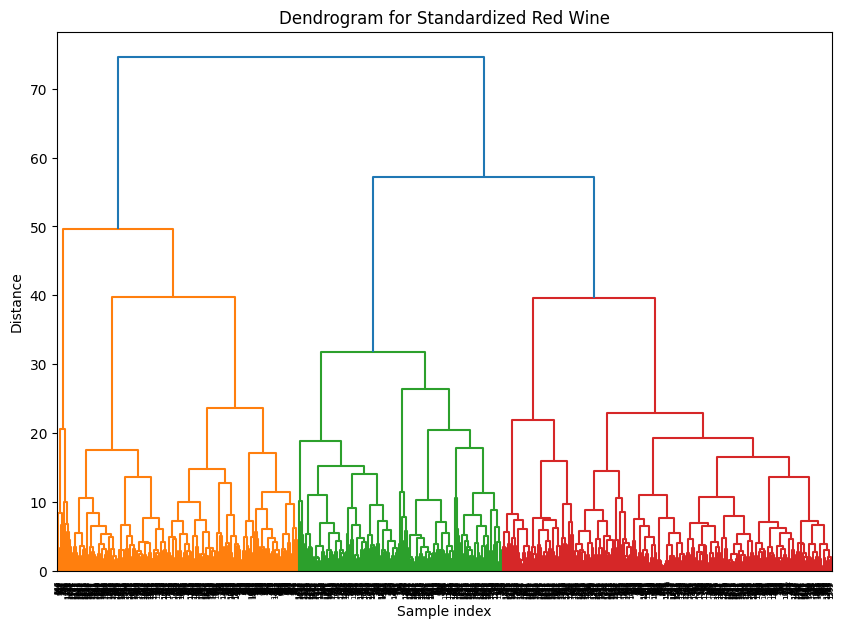

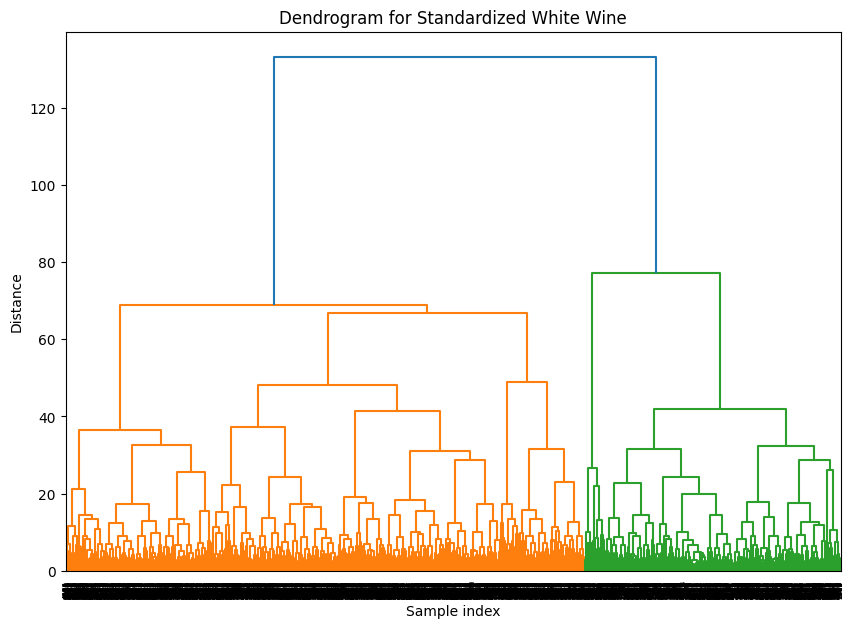

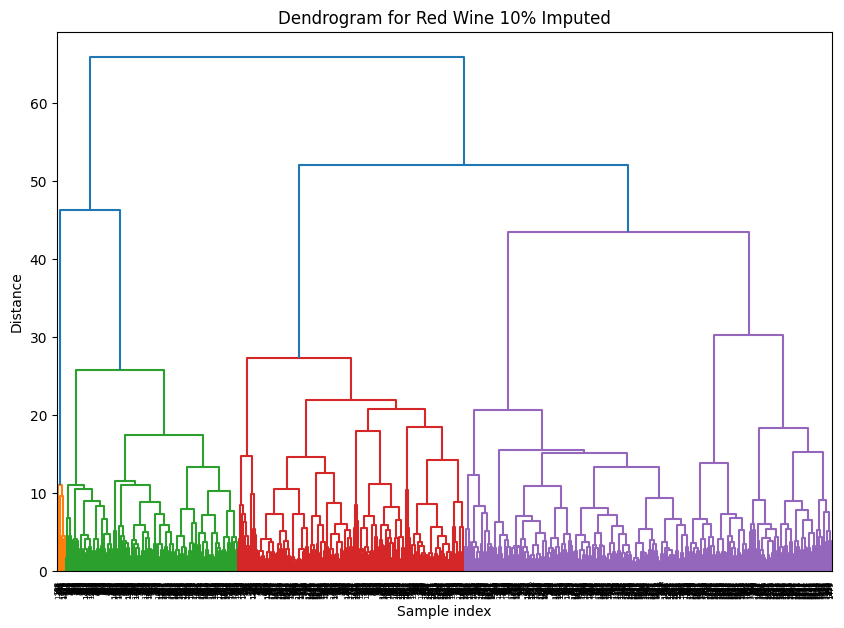

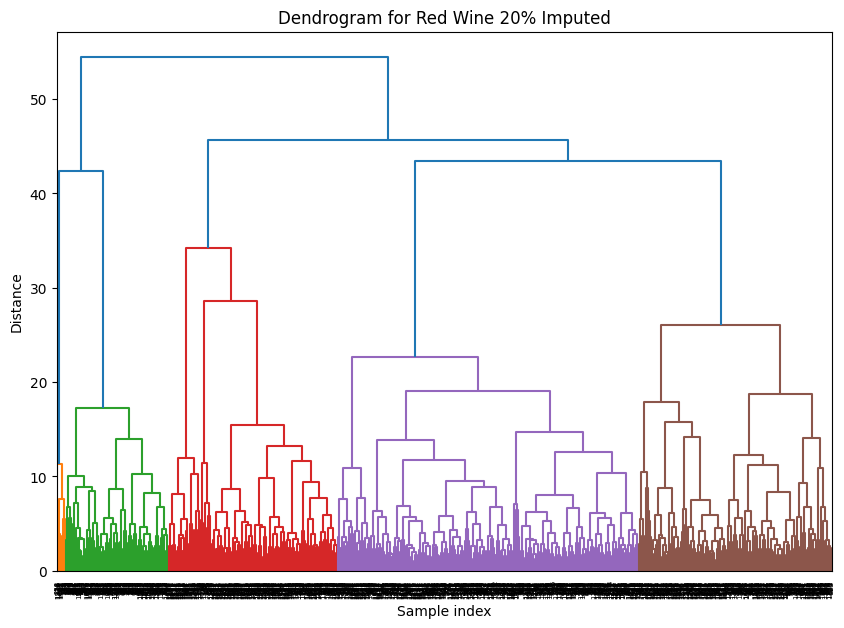

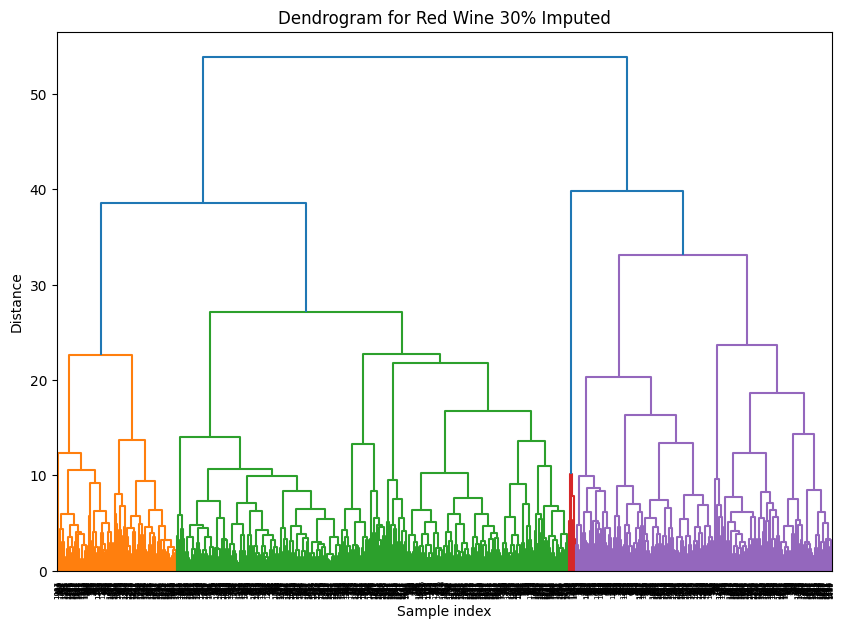

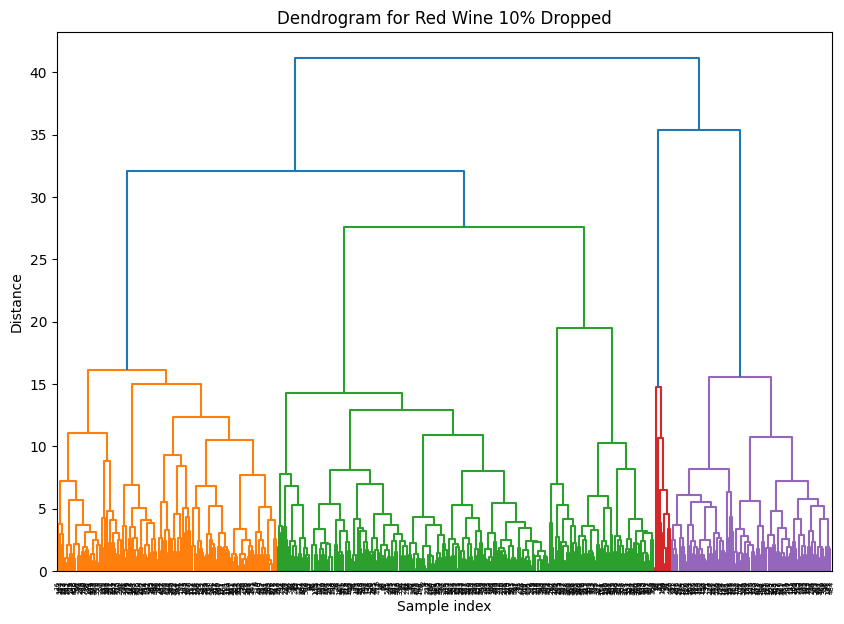

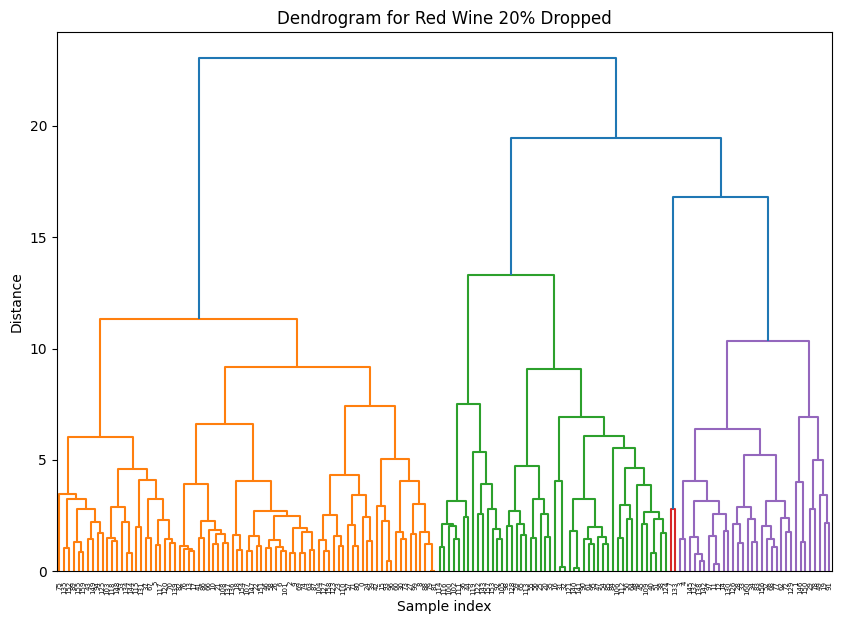

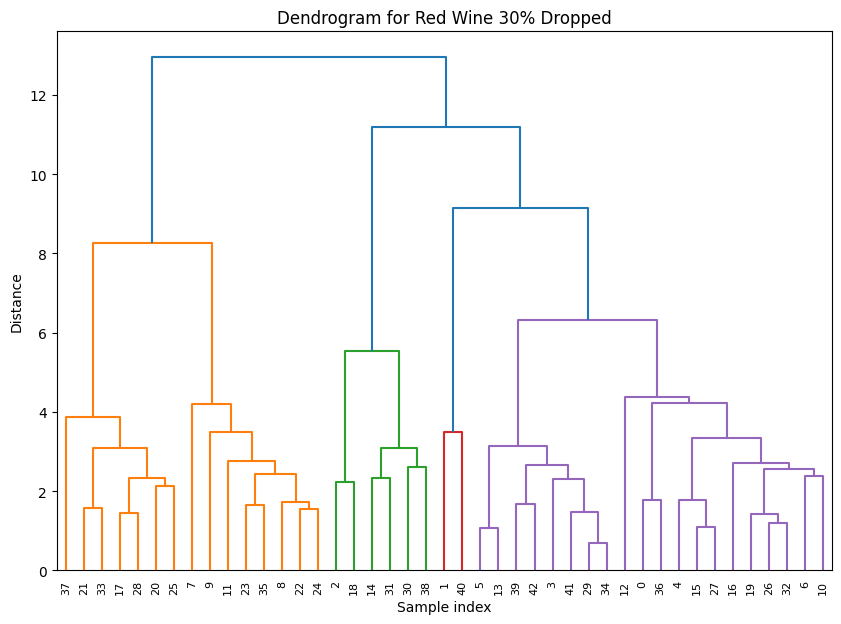

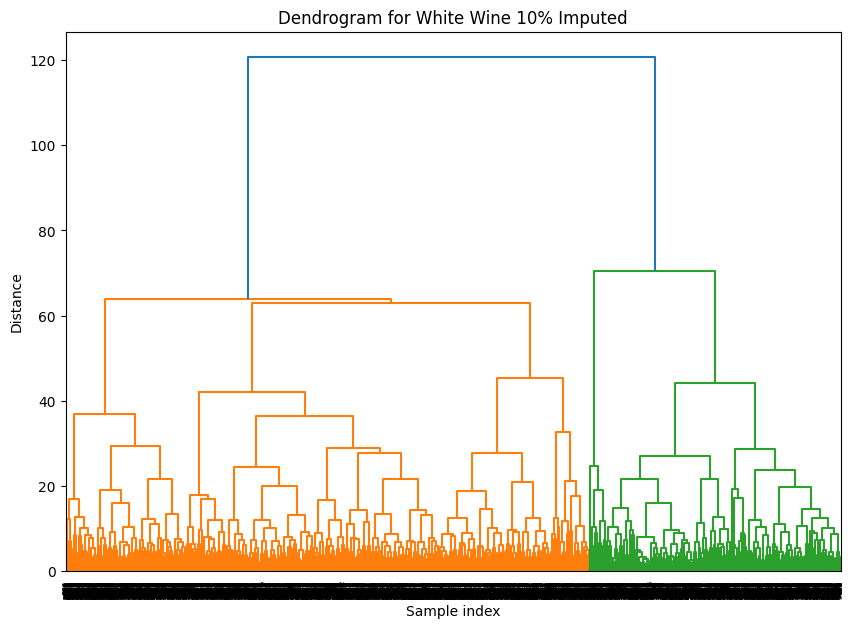

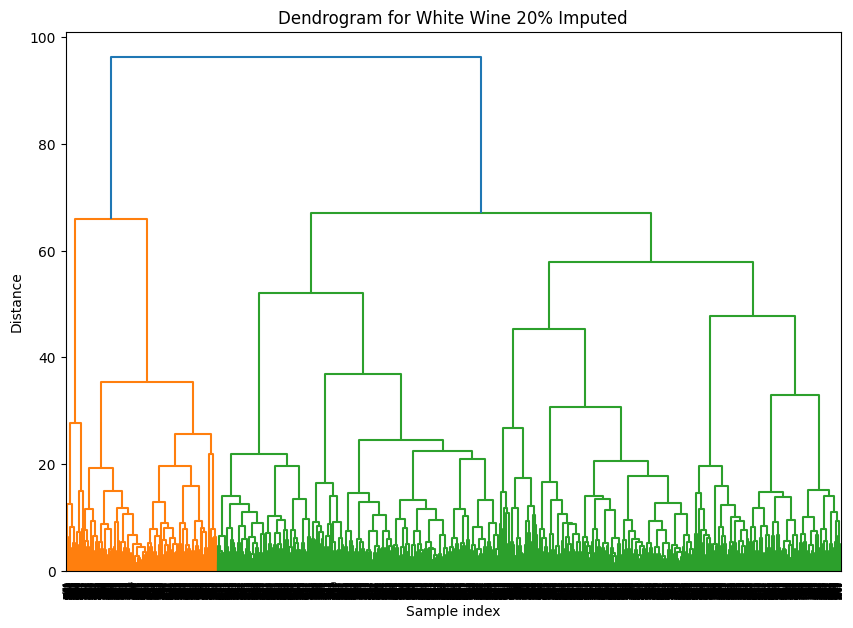

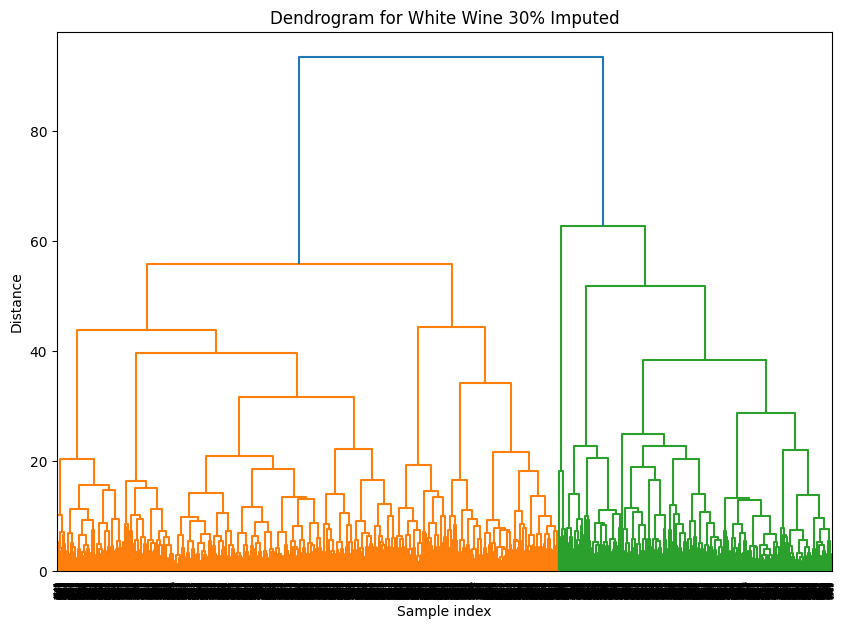

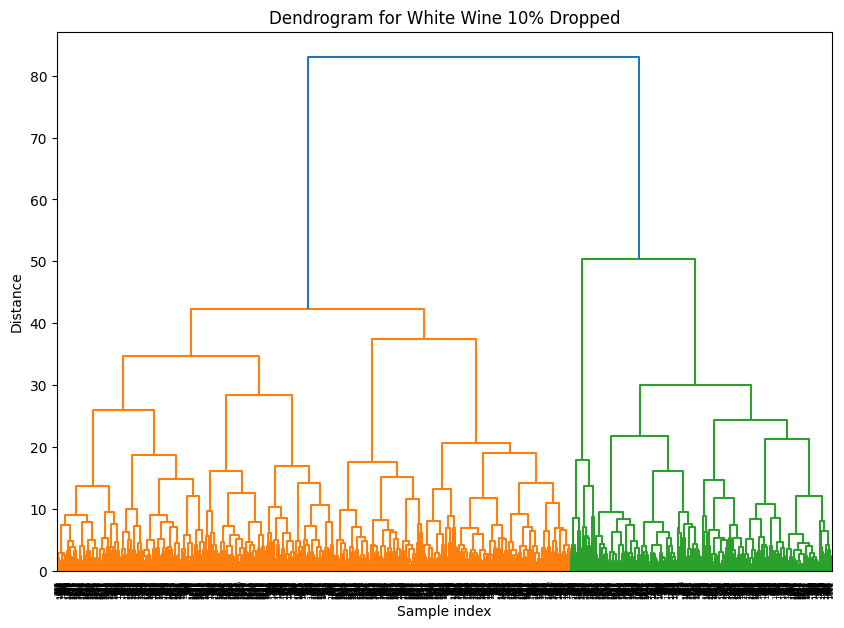

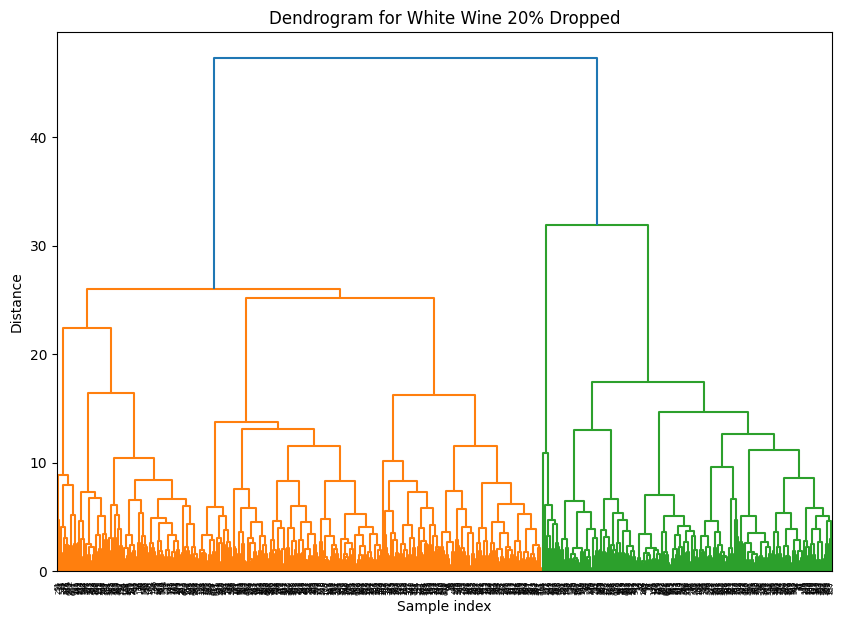

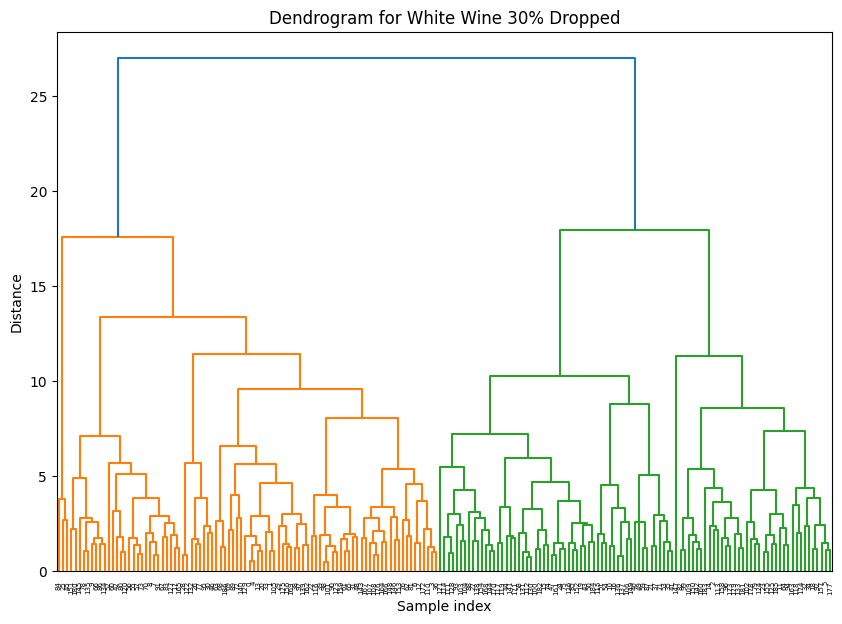

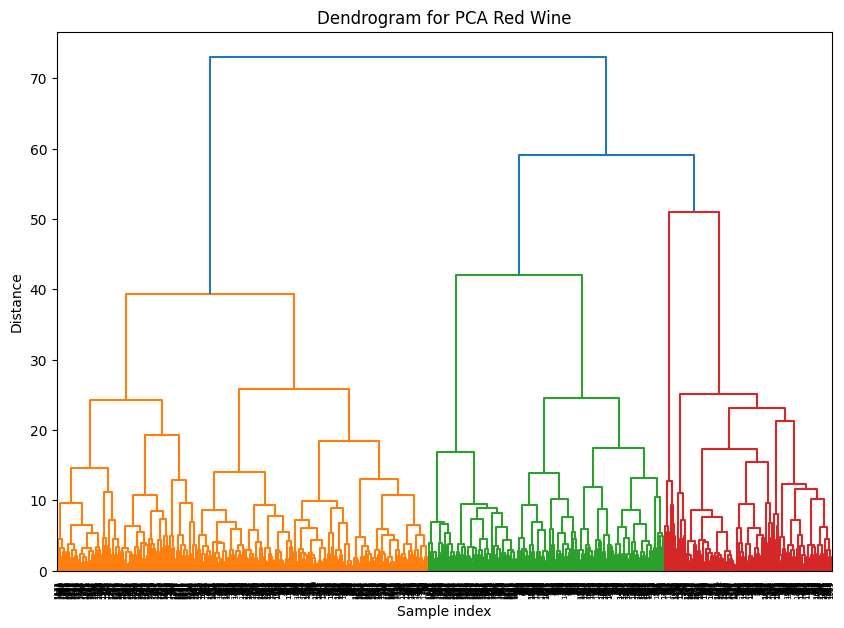

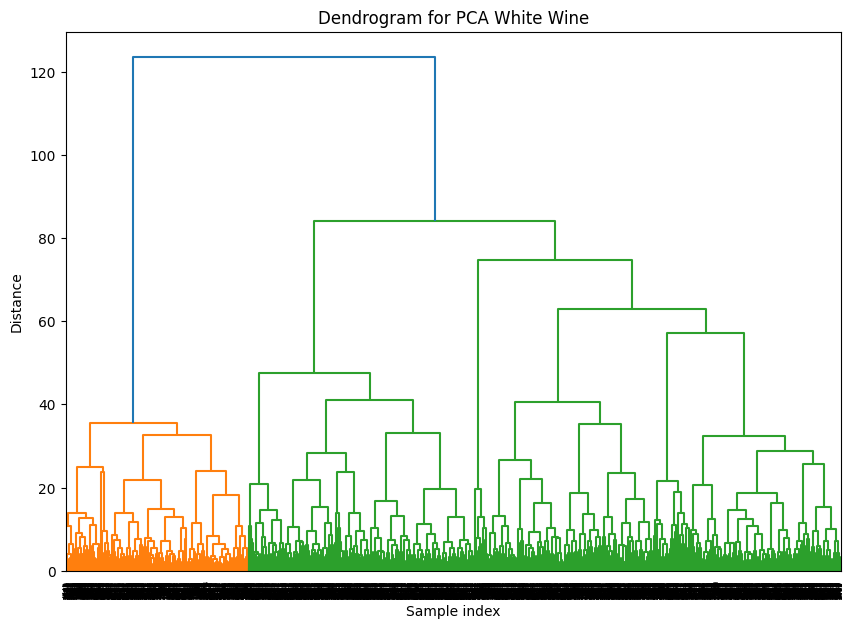

In [168]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Funcao para aplicar o Agglomerative Clustering e criar o dendograma 
def apply_agglomerative_and_plot_dendrogram(X, n_clusters, title):
    
    linkage_matrix = sch.linkage(X, method='ward')

    # Criar o dendograma
    plt.figure(figsize=(10, 7))
    sch.dendrogram(linkage_matrix)
    plt.title(f"Dendrogram for {title}")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.axhline(y=150, color='r', linestyle='--')  # Example threshold line
    plt.show()

    
apply_agglomerative_and_plot_dendrogram(X_red_standardized, 6, "Standardized Red Wine")
apply_agglomerative_and_plot_dendrogram(X_white_standardized, 6, "Standardized White Wine")

apply_agglomerative_and_plot_dendrogram(X_red_10_imputed, 2, "Red Wine 10% Imputed")
apply_agglomerative_and_plot_dendrogram(X_red_20_imputed, 2, "Red Wine 20% Imputed")
apply_agglomerative_and_plot_dendrogram(X_red_30_imputed, 2, "Red Wine 30% Imputed")

apply_agglomerative_and_plot_dendrogram(X_red_10_dropped, 2, "Red Wine 10% Dropped")
apply_agglomerative_and_plot_dendrogram(X_red_20_dropped, 2, "Red Wine 20% Dropped")
apply_agglomerative_and_plot_dendrogram(X_red_30_dropped, 2, "Red Wine 30% Dropped")

apply_agglomerative_and_plot_dendrogram(X_white_10_imputed, 2, "White Wine 10% Imputed")
apply_agglomerative_and_plot_dendrogram(X_white_20_imputed, 2, "White Wine 20% Imputed")
apply_agglomerative_and_plot_dendrogram(X_white_30_imputed, 2, "White Wine 30% Imputed")

apply_agglomerative_and_plot_dendrogram(X_white_10_dropped, 2, "White Wine 10% Dropped")
apply_agglomerative_and_plot_dendrogram(X_white_20_dropped, 2, "White Wine 20% Dropped")
apply_agglomerative_and_plot_dendrogram(X_white_30_dropped, 2, "White Wine 30% Dropped")

apply_agglomerative_and_plot_dendrogram(X_red_pca, 6, "PCA Red Wine")
apply_agglomerative_and_plot_dendrogram(X_white_pca, 6, "PCA White Wine")

